* `t-SNE` creates a 2D map of a dataset and conveys information about proximity of samples.
* `Heirarchial Clustering` clusters samples into a hierarchy.

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('eurovision.csv')

In [8]:
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [0]:
countries=df['From country'].values
scores=df[[col for col in df.columns[2:9]]].values

In [0]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

In [0]:
new_scores=scores[23:47,:]

In [0]:
new_countries=countries[23:47]

In [0]:
mergings=linkage(new_scores,method='complete')

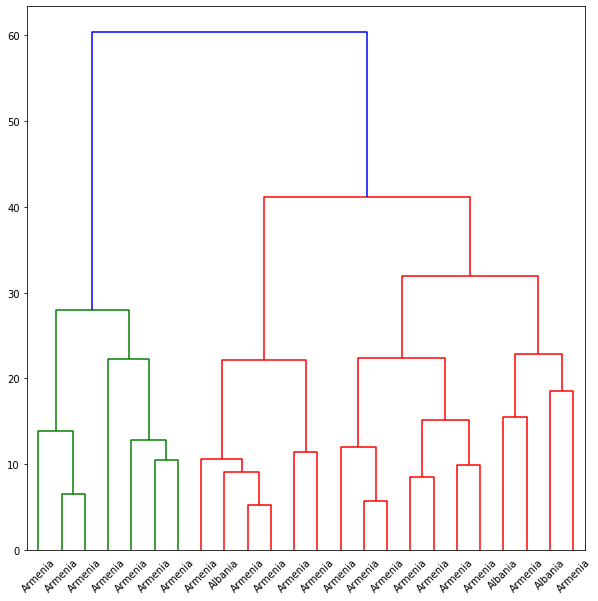

In [76]:
plt.figure(figsize=(10,10))
dendrogram(mergings,labels=new_countries) # leaf_rotation and leaf_font_size help adjust the display of values on the x axis
plt.show()

In [0]:
from scipy.cluster.hierarchy import fcluster

labels=fcluster(mergings,50,criterion='distance')

In [84]:
labels.shape

(24,)

In [85]:
new_countries.shape

(24,)

In [86]:
new_countries

array(['Albania', 'Albania', 'Albania', 'Armenia', 'Armenia', 'Armenia',
       'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia',
       'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia',
       'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia'],
      dtype=object)

In [87]:
labels

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [0]:
datadict={
    'country':new_countries,
    'label':labels
}

In [0]:
dataf=pd.DataFrame(datadict)

In [96]:
dataf.sample(20)

,country,label
20,Armenia,2
15,Armenia,2
5,Armenia,2
13,Armenia,2
4,Armenia,2
16,Armenia,2
21,Armenia,2
1,Albania,2
12,Armenia,1
18,Armenia,2


In [100]:
pd.crosstab(dataf.country,dataf.label)

label,1,2
country,,
Albania,0,3
Armenia,7,14
